In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen #url의 html 을 가져 오기 위한 패키지
from bs4 import BeautifulSoup  #크롤링 필수 패키지 설치하려면 cmd창에서 pip install bs4
import os
import re
from selenium import webdriver
from bs4 import BeautifulSoup #크롤링 도구
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import os
import re
import time
import json
import datetime
from konlpy.tag import Okt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
import sklearn as skl
import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from ckonlpy.tag import Twitter
import string
import glob
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import warnings
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import font_manager, rc
from ckonlpy.tag import Postprocessor

In [2]:
data50 = pd.read_excel('C:/Users/USER/Desktop/1~8newsurl/data0923.xlsx', index_col=0)#데이터 불러오기
embedding_model = KeyedVectors.load_word2vec_format('C:/Users/USER/Desktop/1~8newsurl/w2v0923') # 모델 로드
data50['words'] = [i.replace("'", "").replace('[', '').replace(']', '').replace(' ', '').split(',') for i in
          list(data50['words'])]  # words가 텍스트 형식으로 되어 있을 경우


In [3]:
#한글자 제외
data = data50.reset_index()
words = list(data['words'])
for k in range(len(words)):
    words[k] = [i for i in words[k] if len(i) > 2 or i in ['배달','택배','고용','취업','실업','채용','구직','청년','유통','해고']]  # 두글자 이하 제외
data['words'] = words
data['words'][:5]

0    [코로나19, 삼일절, 행정안전부, 보건복지부, 국무위원, 광복회, 행정안전부, 코...
1    [지난해, 삼척시, 코로나19, 활성화, 지난해, 디딤돌, 도시재생, 어르신, 일자...
2    [코로나19, 확진자, 신천지, 신천지, 두문불출, 박원순, 유시민, 대구시, 신천...
3    [아시아, 김현정, 코로나바이러스, 감염증, 코로나19, 추가경정예산, 호흡기, 증...
4    [김선경, 코로나19, 지난해, 코로나19, 확실성, 자원부, 지난해, 반도체, 데...
Name: words, dtype: object

In [15]:
for i in words:
    if '배달' in i:
        print('있음')


있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있음
있

In [4]:
def word_score2(word,allnum,num):
    a =[]
    for j in range(len(data)):
        if word in data['words'][j]:
            a.append(data.iloc[j])
    a = pd.DataFrame(a).reset_index(drop=True)
    a['cw'] = word
    a = a[['cw','date','title','text','category','url','words']]
    aa = a['words']
    #a2 = [i.replace("'","").replace('[','').replace(']','').replace(' ','').split(',') for i in aa] #words가 텍스트 형식으로 되어 있을 경우
    a2 = a['words'] #words가 list로 되어 있을 경우
    #score구하기
    avg_dist = []
    dist = []
    dist_dist = []
    for i in tqdm(range(len(a2))):
        for k in a2[i]:
            try:
                 # 비교하여 similarity 구하기
                dist_dist.append(embedding_model.similarity(word, k))
            except:
                dist_dist.append(0)
            dist2 = np.array(dist_dist)
            dist.append(sum(dist2))
            dist_dist = []
        if len(dist) > 1000:
            dist = sorted(dist, reverse=True)[:1000]
        avg_dist.append(np.mean(dist))
        dist = []
    avg_dist
    a['score'] = avg_dist
    #이상치 경계 구하기
    q1 = np.percentile(a['score'], 25)
    q3 = np.percentile(a['score'],75)
    iqr = q3-q1
    outlier = q1 -  1.5 * iqr
    print(outlier, ' 값 이하 제거 필요')
    j=0
    for k in a['score']:
        if k < outlier:
            j +=1
    print('이상치 ', j, '개 있음')
    plt.subplot(int('1'+ str(allnum) + str(num))) #박스플랏 바꿔야함
    sns.boxplot( data = a['score'])
    plt.title(word)
    plt.axis('off')
    plt.show()
    return a

###정제된 키워드별 기사들로 각각 토픽모델링 해보기

#이상치 자르기
def cut_row(word):
    # word단어가 포함된 기사만 가져오기
    a =[]
    for j in range(len(data)):
        if word in data['words'][j]:
            a.append(data.iloc[j])
    a = pd.DataFrame(a).reset_index(drop=True)
    a['cw'] = word
    a = a[['cw','date','title','text','category','url','words']]
    a2 = a['words']
    #score 구하기
    avg_dist = []
    dist = []
    dist_dist = []
    for i in tqdm(range(len(a2))):
        for k in a2[i]:
            try:
                 # 비교하여 similarity 구하기
                dist_dist.append(embedding_model.similarity(word, k))
            except:
                dist_dist.append(0)
            dist2 = np.array(dist_dist)
            dist.append(sum(dist2))
            dist_dist = []
        if len(dist) > 1000:
            dist = sorted(dist, reverse=True)[:1000]
        avg_dist.append(np.mean(dist))
        dist = []
    a['score'] = avg_dist

    #이상치 구하기
    q1 = np.percentile(a['score'], 25)
    q3 = np.percentile(a['score'],75)
    iqr = q3-q1
    outlier = q1 -  1.5 * iqr
    print(outlier, ' 값 이하 제거 필요')
    j=0
    for k in a['score']:
        if k < outlier:
            j +=1
    print('이상치 ', j, '개 제거')
    return_data = a[a['score'] > outlier]
    return return_data

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
def topic(word):
    bb2 = cut_row(word)
    #news = [i.replace("'", "").replace('[', '').replace(']', '').replace(' ', '').split(',') for i in
    #        list(bb2['words'])]  # words가 텍스트 형식으로 되어 있을 경우
    news = bb2['words']
    id2word = corpora.Dictionary(news)
    texts = news
    corpus = [id2word.doc2bow(text) for text in texts]

    def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
        coherence_values = []
        model_list = []
        for num_topics in tqdm(range(start, limit, step)):

            model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=num_topics,
                                                    random_state=100,
                                                    update_every=1,
                                                    chunksize=100,
                                                    passes=10,
                                                    alpha='auto',
                                                    per_word_topics=True)
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append(coherencemodel.get_coherence())
        return model_list, coherence_values
    model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2,
                                                            limit=20, step=1)

    # Show graph
    limit = 20; start = 2; step = 1;
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    print(coherence_values.index(max(coherence_values)) + 2,'개의 주제가 이상적')
    print(word)
    #주제 dataframe화 하기
    coherence_values.index(max(coherence_values))
    optimal_model = model_list[coherence_values.index(max(coherence_values))]
    topic_dic = {}
    for i in range(coherence_values.index(max(coherence_values)) + 2):
        words2 = optimal_model.show_topic(i, topn=20)
        topic_dic['topic ' + '{:02d}'.format(i + 1)] = [i[0] for i in words2]
    da = pd.DataFrame(topic_dic)
    return da

#a = cut_row('비대면')

In [5]:
#이상치 자르기
def cut_row3(word):
    # word단어가 포함된 기사만 가져오기
    a =[]
    for j in range(len(data)):
        if word in data['words'][j]:
            a.append(data.iloc[j])
    a = pd.DataFrame(a).reset_index(drop=True)
    a['cw'] = word
    a = a[['cw','date','title','text','category','url','words']]
    a2 = a['words']
    #score 구하기
    
    xx = embedding_model.most_similar(positive=[word], topn=2)
    xx_0 = [i[1] for i in xx]
    xx_l = np.array(xx_0)
    xx_n = [i[0] for i in xx]
    avg_dist = []
    dist = []
    dist_dist = []
    for i in tqdm(range(len(a2))):
        for k in a2[i]:
            try:
                for m in xx_n:
                    # 비교하여 similarity 구하기
                    dist_dist.append(embedding_model.similarity(m, k))
            except:
                dist_dist.append(0)
            dist2 = np.array(dist_dist)
            sc = dist2 * xx_l
            dist.append(sum(sc))
            dist_dist = []
        if len(dist) > 1000:
            dist = sorted(dist, reverse=True)[:1000]
        avg_dist.append(np.mean(dist))
        dist = []
    a['score'] = avg_dist

    #이상치 구하기
    q1 = np.percentile(a['score'], 25)
    q3 = np.percentile(a['score'],75)
    iqr = q3-q1
    outlier = q1 -  1.5 * iqr
    print(outlier, ' 값 이하 제거 필요')
    j=0
    for k in a['score']:
        if k < outlier:
            j +=1
    print('이상치 ', j, '개 제거')
    return_data = a[a['score'] > outlier]
    return return_data

In [14]:
def cut_row4(word):
    # word단어가 포함된 기사만 가져오기
    a =[]
    for j in range(len(data)):
        if word in data['words'][j]:
            a.append(data.iloc[j])
    a = pd.DataFrame(a).reset_index(drop=True)
    a['cw'] = word
    a = a[['cw','date','title','text','category','url','words']]
    a2 = a['words']
    #score 구하기
    avg_dist = []
    dist = []
    dist_dist = []
    for i in tqdm(range(len(a2))):
        for k in a2[i]:
            try:
                 # 비교하여 similarity 구하기
                dist_dist.append(embedding_model.similarity(word, k))
            except:
                dist_dist.append(0)
            dist2 = np.array(dist_dist)
            dist.append(sum(dist2))
            dist_dist = []
        if len(dist) > 1000:
            dist = sorted(dist, reverse=True)[:1000]
        avg_dist.append(np.mean(dist))
        dist = []
    a['score'] = avg_dist

    #이상치 구하기
    q1 = np.percentile(a['score'], 25)
    q3 = np.percentile(a['score'],75)
    iqr = q3-q1
    outlier = q1 -  1.5 * iqr
    print(outlier, ' 값 이하 제거 필요')
    j=0
    for k in a['score']:
        if k < outlier:
            j +=1
    print('이상치 ', j, '개 제거')
    return_data = a[a['score'] > outlier]
    return j, len(a2)
wordlist123 = ['재택근무','청년','배달','특수고용직','소상공인',
               '택배','출퇴근','유연근무제','화상회의','비대면','언택트','유통','유통업계',
              '자영업자']
a = []; b = []
for i in wordlist123: 
    print(i)
    out, leng = cut_row4(i)
    a.append(out)
    b.append(leng)
asd1 = {'name' : wordlist123,
        'count' : b,
       'outlier2020' : a}
df = pd.DataFrame(asd1)
df.to_excel('C:/Users/USER/Desktop/1~8newsurl/topicmodeling/2020outlier.xlsx', header=True)  # 저장하기
    

재택근무


100%|█████████████████████████████████████████████████████████████████████████████| 1270/1270 [00:01<00:00, 920.31it/s]


-0.07134104749937228  값 이하 제거 필요
이상치  0 개 제거
청년


100%|█████████████████████████████████████████████████████████████████████████████| 1313/1313 [00:01<00:00, 858.78it/s]


-0.11078447691268392  값 이하 제거 필요
이상치  0 개 제거
배달


100%|█████████████████████████████████████████████████████████████████████████████| 1107/1107 [00:01<00:00, 878.83it/s]


-0.11821194076639355  값 이하 제거 필요
이상치  0 개 제거
특수고용직


100%|███████████████████████████████████████████████████████████████████████████████| 277/277 [00:00<00:00, 719.53it/s]


-0.017594428064485024  값 이하 제거 필요
이상치  1 개 제거
소상공인


100%|████████████████████████████████████████████████████████████████████████████| 3282/3282 [00:02<00:00, 1095.23it/s]


-0.061005545782359366  값 이하 제거 필요
이상치  1 개 제거
택배


100%|███████████████████████████████████████████████████████████████████████████████| 533/533 [00:00<00:00, 893.67it/s]


-0.09506602612538036  값 이하 제거 필요
이상치  0 개 제거
출퇴근


100%|███████████████████████████████████████████████████████████████████████████████| 411/411 [00:00<00:00, 801.75it/s]


-0.08463939975442544  값 이하 제거 필요
이상치  0 개 제거
유연근무제


100%|███████████████████████████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 904.14it/s]


-0.08349035662327031  값 이하 제거 필요
이상치  0 개 제거
화상회의


100%|███████████████████████████████████████████████████████████████████████████████| 667/667 [00:00<00:00, 928.85it/s]


-0.04621121730868663  값 이하 제거 필요
이상치  2 개 제거
비대면


100%|█████████████████████████████████████████████████████████████████████████████| 4159/4159 [00:04<00:00, 965.74it/s]


-0.08539914717316127  값 이하 제거 필요
이상치  0 개 제거
언택트


100%|█████████████████████████████████████████████████████████████████████████████| 1820/1820 [00:02<00:00, 887.99it/s]


0.0011402624225447244  값 이하 제거 필요
이상치  7 개 제거
유통


100%|█████████████████████████████████████████████████████████████████████████████| 2331/2331 [00:02<00:00, 951.64it/s]


-0.098985472028841  값 이하 제거 필요
이상치  3 개 제거
유통업계


100%|███████████████████████████████████████████████████████████████████████████████| 384/384 [00:00<00:00, 780.99it/s]


0.006010272427010355  값 이하 제거 필요
이상치  2 개 제거
자영업자


100%|█████████████████████████████████████████████████████████████████████████████| 1373/1373 [00:01<00:00, 908.91it/s]

-0.07958685054678673  값 이하 제거 필요
이상치  0 개 제거


In [7]:
#3글자 이상 및 배달고용택배 하고 이미있는 3글자 제거
'''기존의 word = ['비대면','의료진','소상공인','취약계층','재택근무','원격수업','자영업자','배달','화상회의','고용','경제활동','간호사',
         '근로자','실업','금융지원','해고','기본소득','무급휴직','택배','고용유지지원금','노동자','실업자','출퇴근',
         '실업률','구직','일자리','유연근무제','특수고용직','비정규직','프랜차이즈','고용노동부','스타트업','유통',
         '취업','채용','청년','저소득층','실업급여','유통업계','고용안정지원금','공유오피스'] '''
word = ['고용','배달','근로자','실업','금융지원','해고','기본소득','무급휴직','택배','고용유지지원금','노동자','실업자','출퇴근',
         '실업률','구직','일자리','유연근무제','특수고용직','비정규직','프랜차이즈','고용노동부','스타트업','유통',
         '취업','채용','청년','저소득층','실업급여','유통업계','고용안정지원금','공유오피스']

100%|█████████████████████████████████████████████████████████████████████████████| 4159/4159 [00:04<00:00, 952.89it/s]


-0.088393385420002  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [07:14<00:00, 24.13s/it]


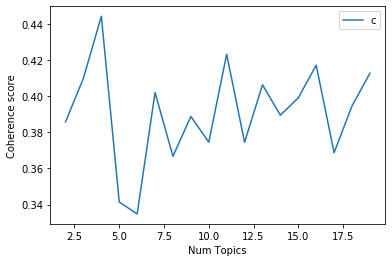

4 개의 주제가 이상적
비대면


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.039149519033880226  값 이하 제거 필요
이상치  10 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [05:05<00:00, 16.99s/it]


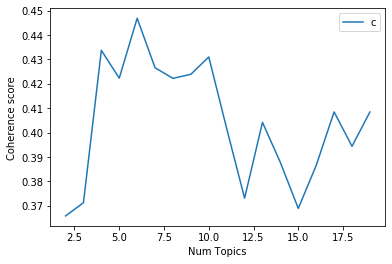

6 개의 주제가 이상적
의료진


100%|████████████████████████████████████████████████████████████████████████████| 3282/3282 [00:03<00:00, 1090.68it/s]


-0.070487527273527  값 이하 제거 필요
이상치  1 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [05:31<00:00, 18.44s/it]


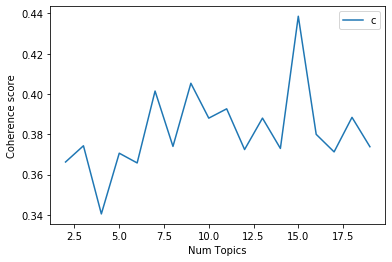

15 개의 주제가 이상적
소상공인


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.051708826435181446  값 이하 제거 필요
이상치  2 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [04:04<00:00, 13.58s/it]


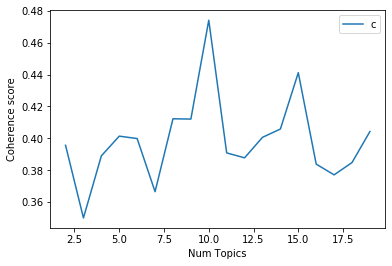

10 개의 주제가 이상적
취약계층


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.07304333125659176  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:41<00:00, 12.32s/it]


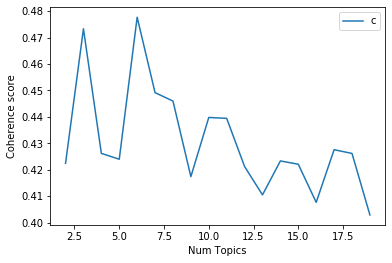

6 개의 주제가 이상적
재택근무


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.03355937686890467  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:02<00:00, 10.11s/it]


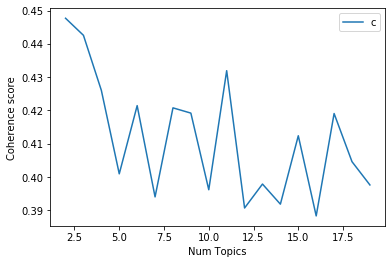

2 개의 주제가 이상적
원격수업


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.07258063728093271  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:48<00:00, 12.71s/it]


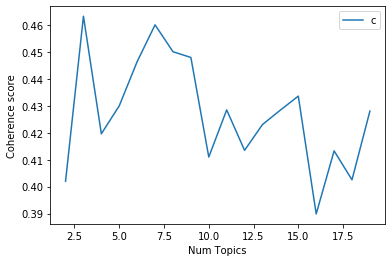

3 개의 주제가 이상적
자영업자


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.0467098424863128  값 이하 제거 필요
이상치  2 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:04<00:00, 10.27s/it]


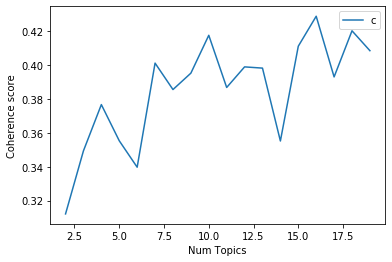

16 개의 주제가 이상적
화상회의


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.06843312646526456  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:33<00:00, 11.86s/it]


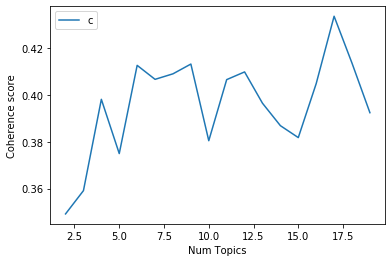

17 개의 주제가 이상적
경제활동


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.050352427539396755  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:10<00:00, 10.60s/it]


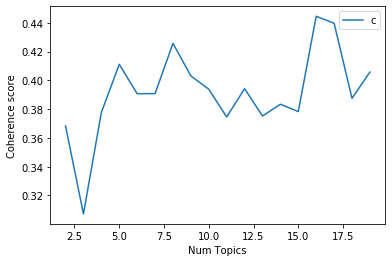

16 개의 주제가 이상적
간호사


In [6]:
for kkk in word:
    topic11 = topic(kkk)
    topic11.to_excel('C:/Users/USER/Desktop/1~8newsurl/topicmodeling/'+str(kkk)+'2글자제거.xlsx', header=True)  # 저장하기

100%|█████████████████████████████████████████████████████████████████████████████| 3104/3104 [00:03<00:00, 866.69it/s]


-0.11182072225179987  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [05:52<00:00, 19.59s/it]


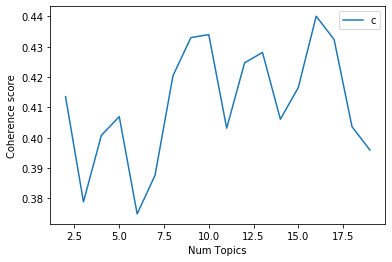

16 개의 주제가 이상적
고용


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.11821194076639355  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:36<00:00, 12.01s/it]


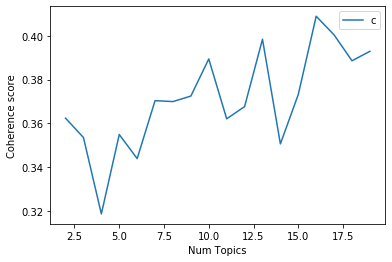

16 개의 주제가 이상적
배달


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.13498232097686053  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [04:08<00:00, 13.80s/it]


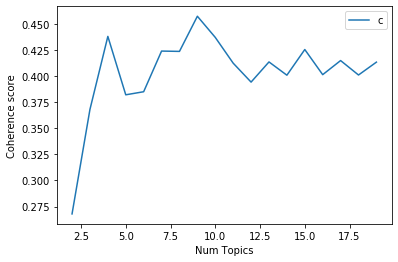

9 개의 주제가 이상적
근로자


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.025616021593259125  값 이하 제거 필요
이상치  1 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:10<00:00, 10.61s/it]


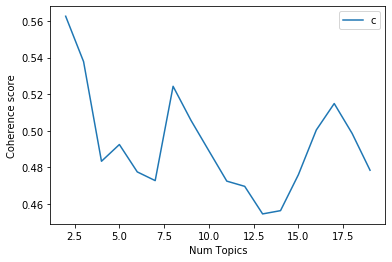

2 개의 주제가 이상적
실업


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.049675856119085565  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:03<00:00, 10.22s/it]


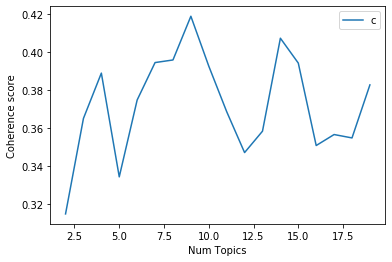

9 개의 주제가 이상적
금융지원


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.07293888361668467  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:50<00:00,  9.48s/it]


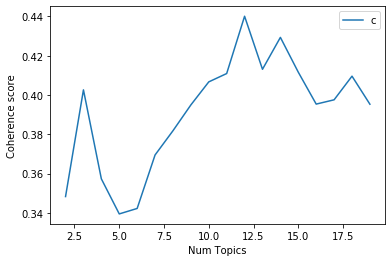

12 개의 주제가 이상적
해고


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.059296158618553585  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:44<00:00,  9.13s/it]


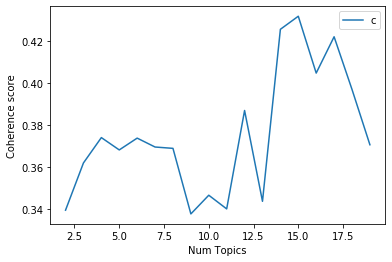

15 개의 주제가 이상적
기본소득


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.07583283244649405  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:50<00:00,  9.49s/it]


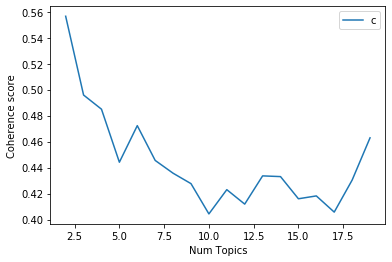

2 개의 주제가 이상적
무급휴직


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.09506602612538036  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:53<00:00,  9.65s/it]


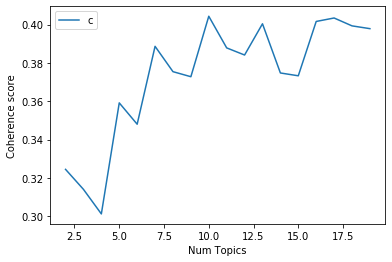

10 개의 주제가 이상적
택배


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.03819468507595292  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:55<00:00,  9.75s/it]


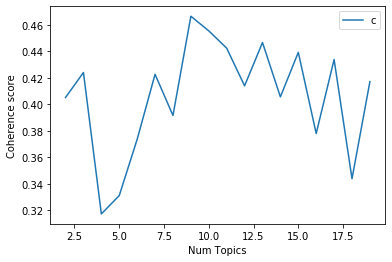

9 개의 주제가 이상적
고용유지지원금


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.14546475555358668  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:48<00:00, 12.71s/it]


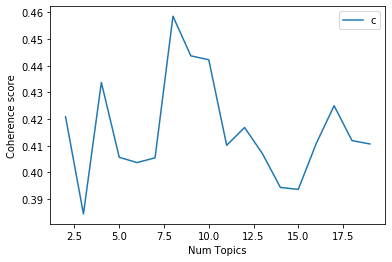

8 개의 주제가 이상적
노동자


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.11411311121983755  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:48<00:00,  9.34s/it]


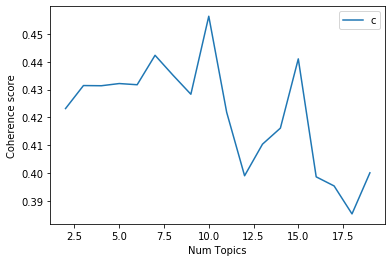

10 개의 주제가 이상적
실업자


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.08463939975442544  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:48<00:00,  9.37s/it]


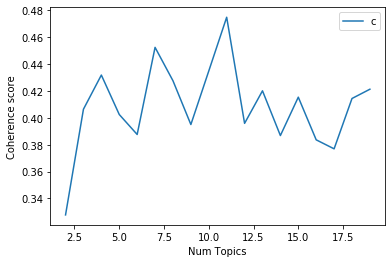

11 개의 주제가 이상적
출퇴근


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.012393089165636917  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:54<00:00,  9.71s/it]


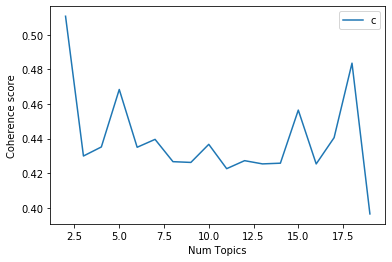

2 개의 주제가 이상적
실업률


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.0011929365240183898  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:53<00:00,  9.65s/it]


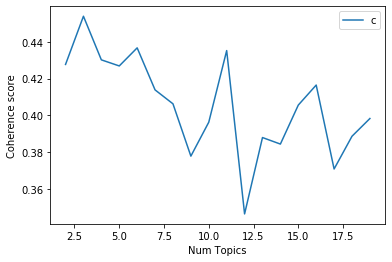

3 개의 주제가 이상적
구직


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.12897320857719022  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [05:21<00:00, 17.87s/it]


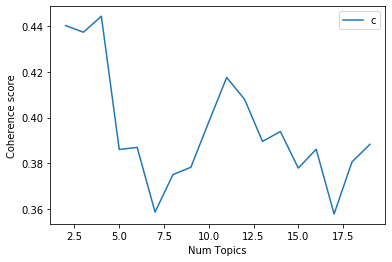

4 개의 주제가 이상적
일자리


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.08349035662327031  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:36<00:00,  8.71s/it]


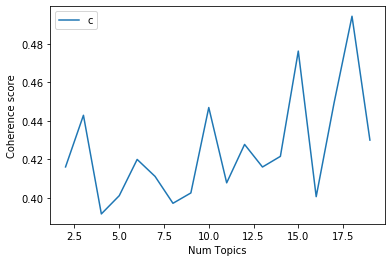

18 개의 주제가 이상적
유연근무제


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.017594428064485024  값 이하 제거 필요
이상치  1 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:46<00:00,  9.27s/it]


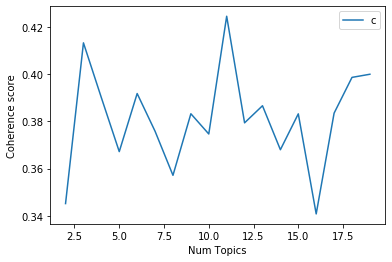

11 개의 주제가 이상적
특수고용직


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.06415228163690437  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:46<00:00,  9.23s/it]


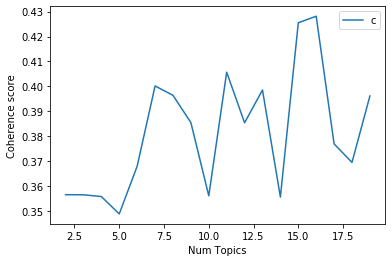

16 개의 주제가 이상적
비정규직


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.06140019396011444  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:45<00:00,  9.21s/it]


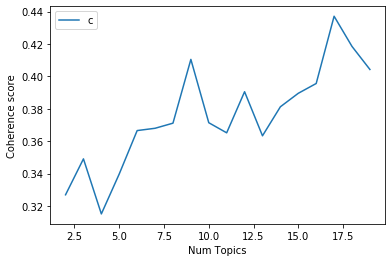

17 개의 주제가 이상적
프랜차이즈


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.004206096992129482  값 이하 제거 필요
이상치  1 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [06:09<00:00, 20.51s/it]


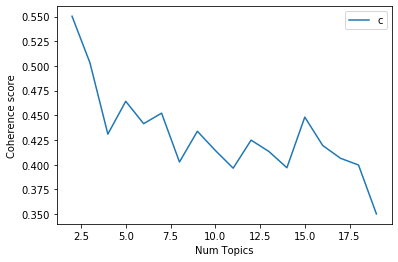

2 개의 주제가 이상적
고용노동부


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.06238145396540229  값 이하 제거 필요
이상치  1 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:08<00:00, 10.46s/it]


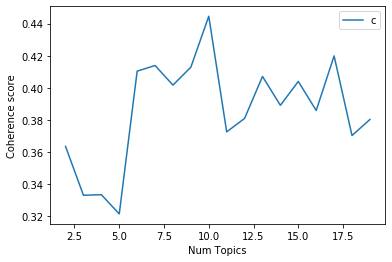

10 개의 주제가 이상적
스타트업


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.098985472028841  값 이하 제거 필요
이상치  3 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [04:50<00:00, 16.16s/it]


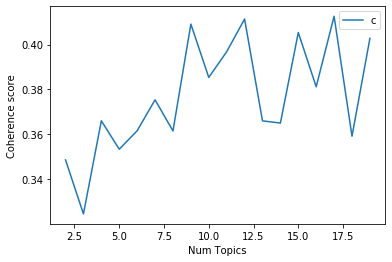

17 개의 주제가 이상적
유통


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.1311999387301442  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:35<00:00, 11.95s/it]


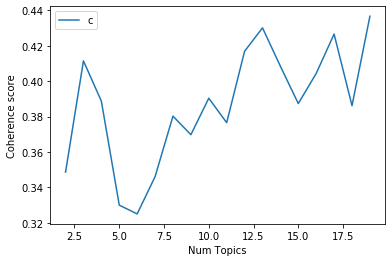

19 개의 주제가 이상적
취업


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.16214043247199855  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:34<00:00, 11.93s/it]


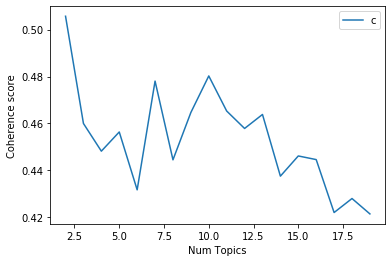

2 개의 주제가 이상적
채용


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.11078447691268392  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:48<00:00, 12.67s/it]


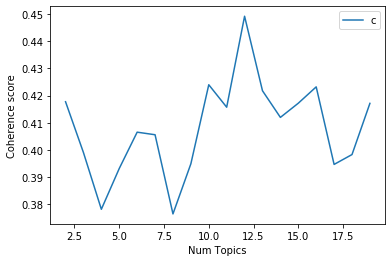

12 개의 주제가 이상적
청년


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.0667239524747211  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:02<00:00, 10.11s/it]


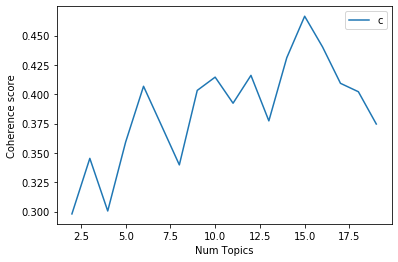

15 개의 주제가 이상적
저소득층


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.04417604146044288  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:47<00:00,  9.30s/it]


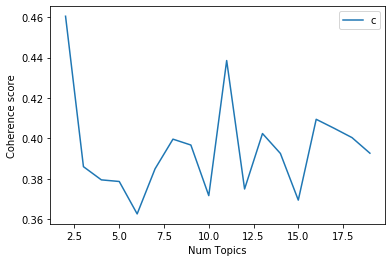

2 개의 주제가 이상적
실업급여


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

0.006010272427010355  값 이하 제거 필요
이상치  2 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:52<00:00,  9.59s/it]


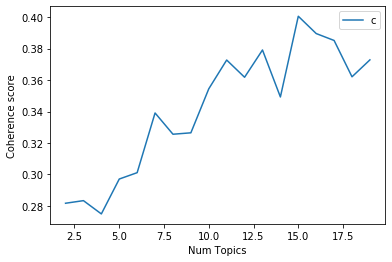

15 개의 주제가 이상적
유통업계


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.12947362301414475  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:36<00:00,  8.70s/it]


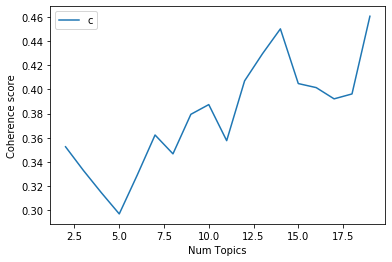

19 개의 주제가 이상적
고용안정지원금


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

0.002204755864521457  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:24<00:00,  8.00s/it]


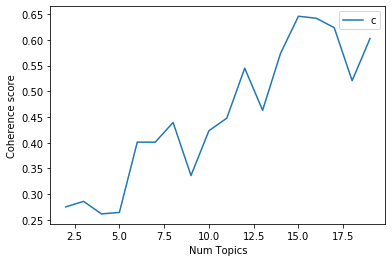

15 개의 주제가 이상적
공유오피스


In [18]:
wor = ['재택근무','유연근무제']

for kkk in wor:
    topic11 = topic(kkk)
    topic11.to_excel('C:/Users/USER/Desktop/1~8newsurl/topicmodeling/'+str(kkk)+'2글자제거.xlsx', header=True)  # 저장하기

100%|█████████████████████████████████████████████████████████████████████████████| 4159/4159 [00:04<00:00, 937.59it/s]


-0.08539914717316127  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [07:09<00:00, 23.84s/it]


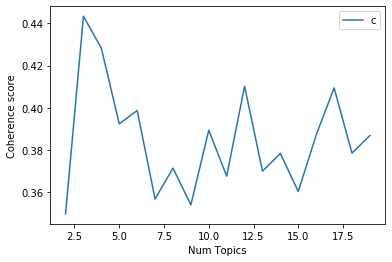

3 개의 주제가 이상적
비대면


100%|█████████████████████████████████████████████████████████████████████████████| 2755/2755 [00:03<00:00, 837.15it/s]


-0.03991921145712016  값 이하 제거 필요
이상치  12 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [05:28<00:00, 18.22s/it]


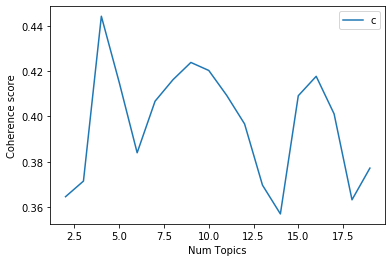

4 개의 주제가 이상적
의료진


100%|████████████████████████████████████████████████████████████████████████████| 3282/3282 [00:03<00:00, 1057.77it/s]


-0.061005545782359366  값 이하 제거 필요
이상치  1 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [05:52<00:00, 19.56s/it]


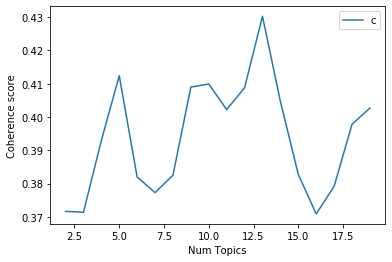

13 개의 주제가 이상적
소상공인


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.04687500994398512  값 이하 제거 필요
이상치  3 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [04:15<00:00, 14.18s/it]


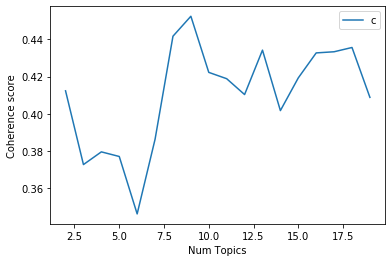

9 개의 주제가 이상적
취약계층


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.07134104749937228  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:55<00:00, 13.09s/it]


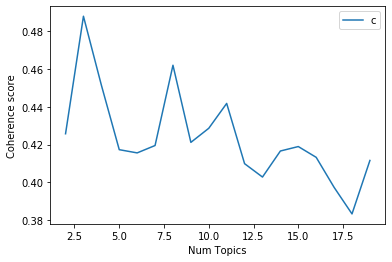

3 개의 주제가 이상적
재택근무


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.03355937686890467  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:08<00:00, 10.48s/it]


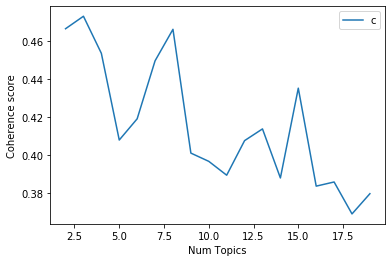

3 개의 주제가 이상적
원격수업


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.07958685054678673  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [04:01<00:00, 13.44s/it]


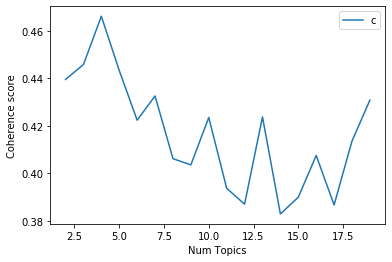

4 개의 주제가 이상적
자영업자


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.04621121730868663  값 이하 제거 필요
이상치  2 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:13<00:00, 10.77s/it]


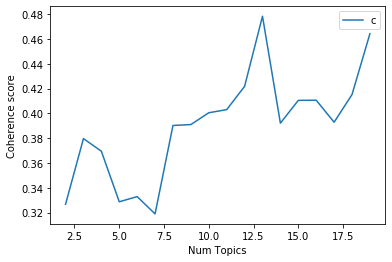

13 개의 주제가 이상적
화상회의


  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

-0.06840500520488983  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:41<00:00, 12.30s/it]


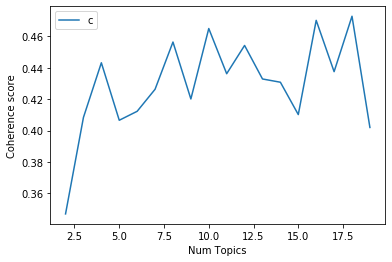

18 개의 주제가 이상적
경제활동


100%|███████████████████████████████████████████████████████████████████████████████| 782/782 [00:00<00:00, 992.52it/s]


-0.051589541392999844  값 이하 제거 필요
이상치  0 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [03:16<00:00, 10.92s/it]


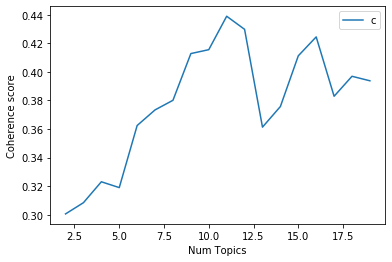

11 개의 주제가 이상적
간호사


In [19]:
word2=['비대면','의료진','소상공인','취약계층','재택근무','원격수업','자영업자','화상회의','경제활동','간호사']
for kkk in word2:
    topic11 = topic(kkk)
    topic11.to_excel('C:/Users/USER/Desktop/1~8newsurl/topicmodeling/'+str(kkk)+'2글자제거.xlsx', header=True)  # 저장하기

  0%|                                                                                           | 0/18 [00:00<?, ?it/s]

0.0011402624225447244  값 이하 제거 필요
이상치  7 개 제거


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [04:26<00:00, 14.78s/it]


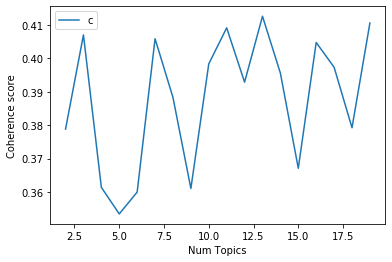

13 개의 주제가 이상적
언택트


In [5]:
topic11 = topic('언택트')
topic11.to_excel('C:/Users/USER/Desktop/1~8newsurl/topicmodeling/'+'언택트'+'2글자제거.xlsx', header=True)

In [13]:
#컷 로우 비교 
for i in word:
    aa = cut_row3(i)
    print(i)

100%|█████████████████████████████████████████████████████████████████████████████| 3104/3104 [00:07<00:00, 391.31it/s]


-0.25250201786943016  값 이하 제거 필요
이상치  0 개 제거
고용


100%|█████████████████████████████████████████████████████████████████████████████| 1107/1107 [00:02<00:00, 378.18it/s]


-0.2896906061589075  값 이하 제거 필요
이상치  0 개 제거
배달


100%|█████████████████████████████████████████████████████████████████████████████| 1817/1817 [00:04<00:00, 428.21it/s]


-0.3021966878006557  값 이하 제거 필요
이상치  0 개 제거
근로자


100%|███████████████████████████████████████████████████████████████████████████████| 673/673 [00:01<00:00, 341.65it/s]


-0.07919167962751511  값 이하 제거 필요
이상치  1 개 제거
실업


100%|███████████████████████████████████████████████████████████████████████████████| 740/740 [00:01<00:00, 497.97it/s]


-0.10604440657688158  값 이하 제거 필요
이상치  0 개 제거
금융지원


100%|███████████████████████████████████████████████████████████████████████████████| 416/416 [00:01<00:00, 339.11it/s]


-0.13936035017704407  값 이하 제거 필요
이상치  0 개 제거
해고


100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 327.67it/s]


-0.13929901416478002  값 이하 제거 필요
이상치  0 개 제거
기본소득


100%|███████████████████████████████████████████████████████████████████████████████| 390/390 [00:00<00:00, 390.26it/s]


-0.1617846030441541  값 이하 제거 필요
이상치  0 개 제거
무급휴직


100%|███████████████████████████████████████████████████████████████████████████████| 533/533 [00:01<00:00, 391.52it/s]


-0.21185292708829628  값 이하 제거 필요
이상치  0 개 제거
택배


100%|███████████████████████████████████████████████████████████████████████████████| 338/338 [00:00<00:00, 382.40it/s]


-0.14163628518586313  값 이하 제거 필요
이상치  0 개 제거
고용유지지원금


100%|█████████████████████████████████████████████████████████████████████████████| 1140/1140 [00:03<00:00, 344.54it/s]


-0.3877691134874912  값 이하 제거 필요
이상치  0 개 제거
노동자


100%|███████████████████████████████████████████████████████████████████████████████| 405/405 [00:01<00:00, 336.44it/s]


-0.24357302016287474  값 이하 제거 필요
이상치  0 개 제거
실업자


100%|███████████████████████████████████████████████████████████████████████████████| 411/411 [00:01<00:00, 368.93it/s]


-0.19952007854098583  값 이하 제거 필요
이상치  0 개 제거
출퇴근


100%|███████████████████████████████████████████████████████████████████████████████| 395/395 [00:01<00:00, 361.03it/s]


-0.017857550288561952  값 이하 제거 필요
이상치  0 개 제거
실업률


100%|███████████████████████████████████████████████████████████████████████████████| 501/501 [00:01<00:00, 369.23it/s]


-0.03910828278362738  값 이하 제거 필요
이상치  0 개 제거
구직


100%|█████████████████████████████████████████████████████████████████████████████| 2634/2634 [00:06<00:00, 386.34it/s]


-0.28714269052187075  값 이하 제거 필요
이상치  0 개 제거
일자리


100%|███████████████████████████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 393.01it/s]


-0.1889860086689702  값 이하 제거 필요
이상치  0 개 제거
유연근무제


100%|███████████████████████████████████████████████████████████████████████████████| 277/277 [00:00<00:00, 330.64it/s]


0.01050747459503848  값 이하 제거 필요
이상치  1 개 제거
특수고용직


100%|███████████████████████████████████████████████████████████████████████████████| 317/317 [00:01<00:00, 311.62it/s]


-0.17779022223415458  값 이하 제거 필요
이상치  0 개 제거
비정규직


100%|███████████████████████████████████████████████████████████████████████████████| 332/332 [00:00<00:00, 424.31it/s]


-0.09125928843276238  값 이하 제거 필요
이상치  0 개 제거
프랜차이즈


100%|███████████████████████████████████████████████████████████████████████████████| 702/702 [00:01<00:00, 399.11it/s]


-0.05127525554749618  값 이하 제거 필요
이상치  0 개 제거
고용노동부


100%|███████████████████████████████████████████████████████████████████████████████| 662/662 [00:01<00:00, 336.78it/s]


-0.13091895919426155  값 이하 제거 필요
이상치  2 개 제거
스타트업


100%|█████████████████████████████████████████████████████████████████████████████| 2331/2331 [00:05<00:00, 414.14it/s]


-0.23142132747990113  값 이하 제거 필요
이상치  0 개 제거
유통


100%|█████████████████████████████████████████████████████████████████████████████| 1082/1082 [00:02<00:00, 394.81it/s]


-0.31797902125767175  값 이하 제거 필요
이상치  0 개 제거
취업


100%|█████████████████████████████████████████████████████████████████████████████| 1179/1179 [00:02<00:00, 405.02it/s]


-0.32073313401793724  값 이하 제거 필요
이상치  0 개 제거
채용


100%|█████████████████████████████████████████████████████████████████████████████| 1313/1313 [00:03<00:00, 379.11it/s]


-0.3225138179730318  값 이하 제거 필요
이상치  0 개 제거
청년


100%|███████████████████████████████████████████████████████████████████████████████| 711/711 [00:01<00:00, 431.20it/s]


-0.1404354217241805  값 이하 제거 필요
이상치  0 개 제거
저소득층


100%|███████████████████████████████████████████████████████████████████████████████| 290/290 [00:00<00:00, 328.92it/s]


-0.12318128138132955  값 이하 제거 필요
이상치  0 개 제거
실업급여


100%|███████████████████████████████████████████████████████████████████████████████| 384/384 [00:01<00:00, 357.82it/s]


0.023746184287376793  값 이하 제거 필요
이상치  2 개 제거
유통업계


100%|█████████████████████████████████████████████████████████████████████████████████| 88/88 [00:00<00:00, 338.03it/s]


-0.2470014963359402  값 이하 제거 필요
이상치  0 개 제거
고용안정지원금


100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 414.14it/s]

0.05207555147680251  값 이하 제거 필요
이상치  0 개 제거
공유오피스
